In [1]:
import numpy as np 
import pandas as pd 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df[['Glucose','BloodPressure','SkinThickness','Insulin',
    'BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [5]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [6]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [7]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5


In [8]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [9]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

In [10]:
median_target('SkinThickness')


,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [11]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32


In [12]:
median_target('BloodPressure')



,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [13]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [14]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [15]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3


In [16]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

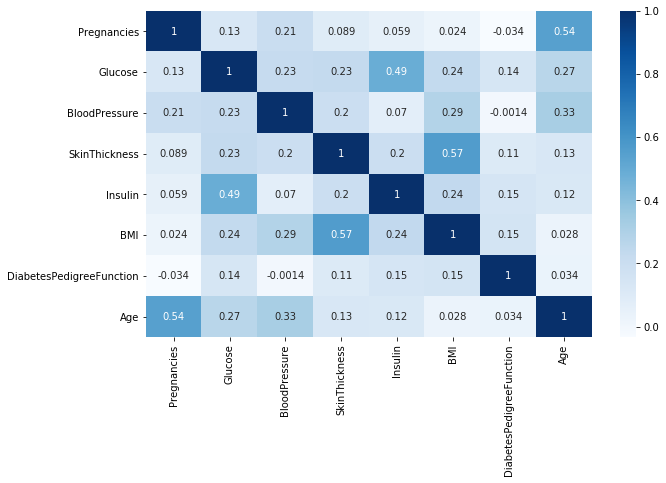

In [17]:
plt.figure(figsize = (10,6))
sns.heatmap(df.drop("Outcome", axis = 1).corr(), cmap = "Blues", annot = True)

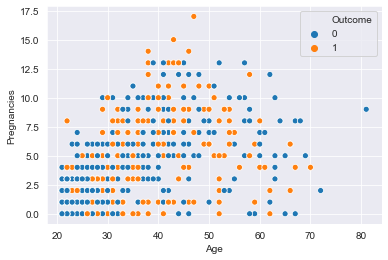

In [18]:
sns.set_style("darkgrid")
sns.scatterplot(x="Age",y="Pregnancies",data=df, hue="Outcome")

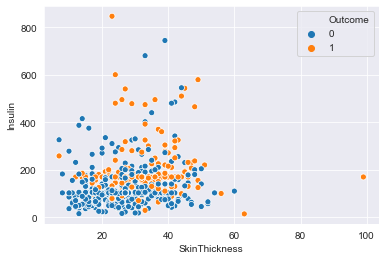

In [19]:
sns.scatterplot(x="SkinThickness",y="Insulin",data=df, hue="Outcome")

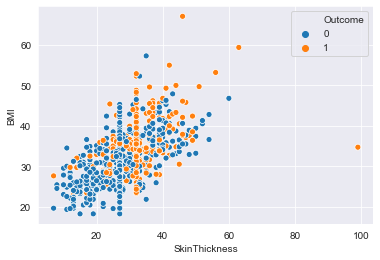

In [20]:
sns.scatterplot(x="SkinThickness",y="BMI",data=df, hue="Outcome")

## Interpretations from the above graphs.


Age vs Pregnancies shows minorly that with low number of pregnancy and lesser age the person tends to not have diabetes. But with increase in age and number of pregnancies chances of getting diabetes increases.

Skin Thickness vs Insulin shows the larger skin thickness and higher insulin values contributes to Diabetes.
When the body doesn't respond properly to the Insulin produced. So this leads to Diabetes and also increased Insulin Levels.


Skin Thickness vs BMI shows higher BMI and larger skin thickness contributes to Diabetes. BMI greater than 25 is already defined as overweight and there are many people in this dataset with BMI greater than 30.

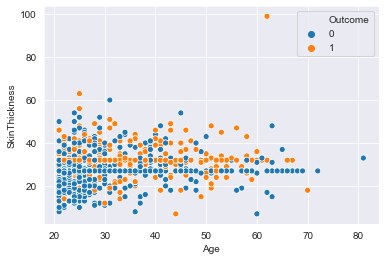

In [21]:
sns.scatterplot(x="Age",y="SkinThickness",data=df, hue="Outcome")

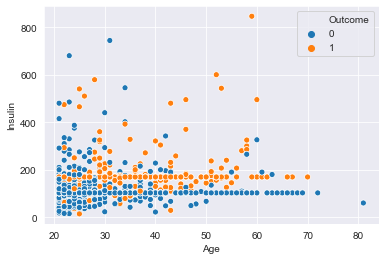

In [22]:
sns.scatterplot(x="Age",y="Insulin",data=df, hue="Outcome")

## Interpretations from the above graphs.


Age vs Skin Thickness shows minorly that with lesser skin thickness and lesser age the person tends to not have diabetes.
But with increase in age and increase in skin thickness chances of getting diabetes increases.


Age vs Insulin shows the higher insulin levels and more aged people tend to have Diabetes.



## Data Preprocessing

After some digging I found that the zeroes in the columns like Insulin levels, BMI, Glucose etc. are just missing values.

Also it was kind of obvious that glucose and other such important attributes of Human Body can never be zero.

So first I'll replace all the zeroes in such columns to NaN values and then impute accordingly with median.

### Data is not missing completely at random

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [25]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_train, y_train)


### Before Over sampling

Text(0, 0.5, 'Frequencies')

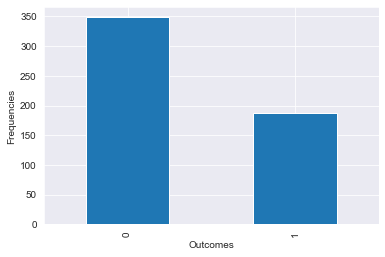

In [26]:
y_train.value_counts().plot(kind = "bar")
plt.xlabel("Outcomes")
plt.ylabel("Frequencies")

### After oversampling

Text(0, 0.5, 'Frequencies')

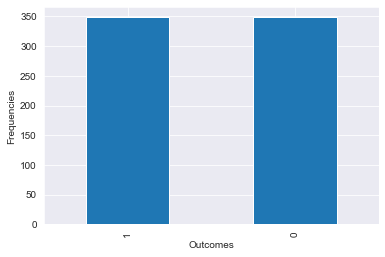

In [27]:
y_train_res.value_counts().plot(kind = "bar")
plt.xlabel("Outcomes")
plt.ylabel("Frequencies")

In [28]:
X_train = X_train_res
y_train = y_train_res

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
df.columns
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X_train1 = pd.DataFrame(X_train, columns=cols)

In [31]:
X_test1 = pd.DataFrame(X_test, columns=cols)

In [32]:
X_data = pd.concat([X_train1, X_test1], axis = 0)

In [33]:
col = ["Outcome"]
y_train1 = pd.DataFrame(y_train, columns=col)
y_test1 = pd.DataFrame(y_test, columns=col)
y_data = pd.concat([y_train1, y_test1], axis = 0)

In [34]:
X_data.shape, y_data.shape

((929, 8), (929, 1))

In [35]:
X_data = X_data.reset_index(drop = True)

In [36]:
y_data = y_data.reset_index(drop=True)

In [37]:
from sklearn.model_selection import KFold, StratifiedKFold
folds = KFold(n_splits = 10)
def model_evaluate(model):
    scores_recall = cross_val_score(model, X_data, y_data, cv = folds, scoring="recall")
    scores_accuracy = cross_val_score(model, X_data, y_data, cv = folds, scoring = "accuracy")
    print("Mean Accuracy : ", scores_accuracy.mean())
    print("Std Accuracy : ", scores_accuracy.std())
    print("Mean Recall : ", scores_recall.mean())
    print("Std Recall : ", scores_recall.std())
        

### Logistic 

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [39]:
lr = LogisticRegression()
model_evaluate(lr)


Mean Accuracy :  0.7620733987844788
Std Accuracy :  0.056545497444609155
Mean Recall :  0.7111518993583432
Std Recall :  0.06799930332885909


In [40]:
import time
def time_calc(model):
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    print(f"Time to train the model {round((end - start), 3)} secs")

In [41]:
time_calc(lr)

Time to train the model 0.004 secs


### KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier


In [43]:
knn = KNeighborsClassifier(1)
model_evaluate(knn)

Mean Accuracy :  0.848153342683497
Std Accuracy :  0.0657153553247249
Mean Recall :  0.8488638936570888
Std Recall :  0.11106158176220356


In [44]:
time_calc(knn)

Time to train the model 0.002 secs


Text(0, 0.5, 'Error Rate')

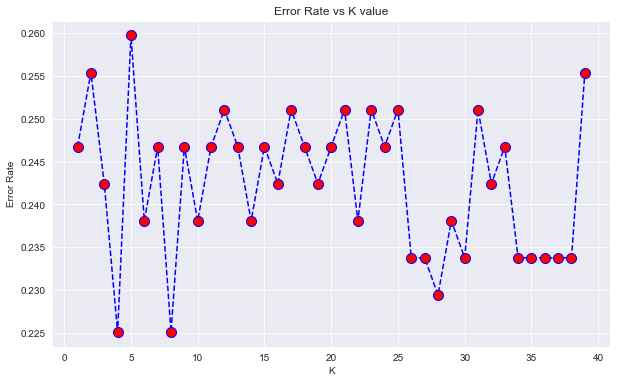

In [45]:
error_rate = []
import matplotlib.pyplot as plt
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [46]:
knn2 = KNeighborsClassifier(n_neighbors=4)
model_evaluate(knn2)

Mean Accuracy :  0.8072230014025245
Std Accuracy :  0.04240843608564972
Mean Recall :  0.7285751705472124
Std Recall :  0.08785929523360288


In [47]:
time_calc(knn2)

Time to train the model 0.002 secs


### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc1 = RandomForestClassifier(n_estimators=200)
model_evaluate(rfc1) # No grid search

Mean Accuracy :  0.9094904160822814
Std Accuracy :  0.04675511901675499
Mean Recall :  0.927276513838326
Std Recall :  0.05260849227706663


In [50]:
time_calc(rfc1)

Time to train the model 0.336 secs


### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
tree = DecisionTreeClassifier()
model_evaluate(tree)

Mean Accuracy :  0.8954651706404861
Std Accuracy :  0.054470702155838824
Mean Recall :  0.8901486991243045
Std Recall :  0.09344268543983757


In [53]:
time_calc(tree)

Time to train the model 0.003 secs


### RFC with Grid Search

In [54]:
rfc = RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num=10)] 
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, verbose=3, cv=10, n_jobs = 4)
grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=3)

In [55]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=4, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=64)

In [56]:
rfc1 = RandomForestClassifier(bootstrap=False, max_depth=4, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=33)
model_evaluate(rfc1)

Mean Accuracy :  0.883683964469378
Std Accuracy :  0.04043867399868111
Mean Recall :  0.9086169202235886
Std Recall :  0.046513348383571934


In [57]:
time_calc(rfc1)

Time to train the model 0.092 secs


## SVM

In [58]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)


SVC()

In [59]:
svc_model = SVC()
param_grid_svm = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
from sklearn.model_selection import RandomizedSearchCV
rndm_cv = GridSearchCV(estimator=svc_model, param_grid=param_grid_svm, cv=10, verbose=2)
rndm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=

[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ...................

[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [60]:
rndm_cv.best_estimator_

SVC(C=10, gamma=1)

In [61]:
svc1 = SVC(C = 1000, gamma = 0.10, probability = True)
model_evaluate(svc1)

Mean Accuracy :  0.8481416549789621
Std Accuracy :  0.06664037746678571
Mean Recall :  0.8515220580501671
Std Recall :  0.0961267223312477


In [62]:
time_calc(svc1)

Time to train the model 0.244 secs


## XGBOOST

In [63]:
from xgboost import XGBClassifier

In [64]:
xgb1 = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
model_evaluate(xgb1)

Mean Accuracy :  0.9181276297335202
Std Accuracy :  0.04561270261794295
Mean Recall :  0.9166526163064133
Std Recall :  0.06542367383021634


In [65]:
time_calc(xgb1)

Time to train the model 0.16 secs


## ROC Curve

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score

In [67]:
r_probs = [0 for _ in range(len(y_test))]
log_probs = lr.predict_proba(X_test)
knn_probs = knn.predict_proba(X_test)
tree_probs = tree.predict_proba(X_test)
rfc_probs = rfc1.predict_proba(X_test)
svm_probs = svc1.predict_proba(X_test)
xgb_probs = xgb1.predict_proba(X_test)

In [68]:
log_probs = log_probs[:,1]
knn_probs = knn_probs[:,1]
tree_probs = tree_probs[:,1]
rfc_probs = rfc_probs[:,1]
svm_probs = svm_probs[:,1]
xgb_probs = xgb_probs[:,1]

In [69]:
r_auc = roc_auc_score(y_test, r_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
tree_auc = roc_auc_score(y_test, tree_probs)
rfc_auc = roc_auc_score(y_test, rfc_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

In [70]:
def print_AUROC(model_name, auc):
    print(f"AUROC for {model_name} is {round(auc, 3)}")

In [71]:
print_AUROC("Random Choice", r_auc)
print_AUROC("KNN", knn_auc)
print_AUROC("Decision Tree", tree_auc)
print_AUROC("Random Forest", rfc_auc)
print_AUROC("SVC", svm_auc)
print_AUROC("Xgb", xgb_auc)

AUROC for Random Choice is 0.5
AUROC for KNN is 0.835
AUROC for Decision Tree is 0.799
AUROC for Random Forest is 0.915
AUROC for SVC is 0.787
AUROC for Xgb is 0.938


In [72]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

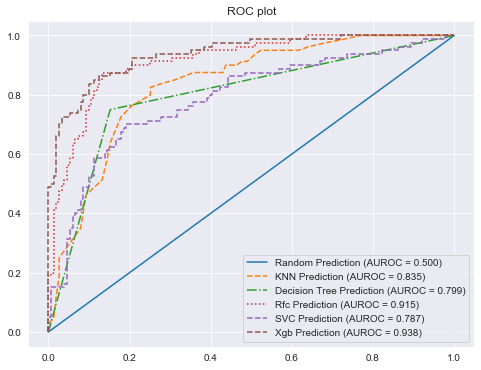

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (8,6))
plt.plot(r_fpr, r_tpr, linestyle = "-", label = "Random Prediction (AUROC = %0.3f)" % r_auc)
plt.plot(knn_fpr, knn_tpr, linestyle = "--", label = "KNN Prediction (AUROC = %0.3f)" % knn_auc)
plt.plot(tree_fpr, tree_tpr, linestyle = "-.", label = "Decision Tree Prediction (AUROC = %0.3f)" %tree_auc)
plt.plot(rfc_fpr, rfc_tpr, linestyle = ":", label = "Rfc Prediction (AUROC = %0.3f)" % rfc_auc)
plt.plot(svm_fpr, svm_tpr, linestyle = "--", label = "SVC Prediction (AUROC = %0.3f)" % svm_auc)
plt.plot(xgb_fpr, xgb_tpr, linestyle = "--", label = "Xgb Prediction (AUROC = %0.3f)" % xgb_auc)
plt.title("ROC plot")
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

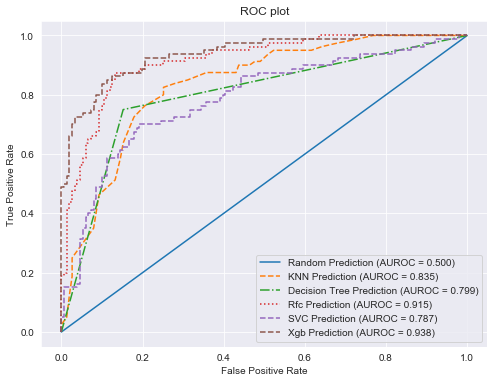

In [74]:
plt.figure(figsize = (8,6))
plt.plot(r_fpr, r_tpr, linestyle = "-", label = "Random Prediction (AUROC = %0.3f)" % r_auc)
plt.plot(knn_fpr, knn_tpr, linestyle = "--", label = "KNN Prediction (AUROC = %0.3f)" % knn_auc)
plt.plot(tree_fpr, tree_tpr, linestyle = "-.", label = "Decision Tree Prediction (AUROC = %0.3f)" %tree_auc)
plt.plot(rfc_fpr, rfc_tpr, linestyle = ":", label = "Rfc Prediction (AUROC = %0.3f)" % rfc_auc)
plt.plot(svm_fpr, svm_tpr, linestyle = "--", label = "SVC Prediction (AUROC = %0.3f)" % svm_auc)
plt.plot(xgb_fpr, xgb_tpr, linestyle = "--", label = "Xgb Prediction (AUROC = %0.3f)" % xgb_auc)
plt.title("ROC plot")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### END

In [75]:
!pip install notebook-as-pdf

  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61087 sha256=4857002e92f792e2f0421d44c5e3231be792ad7ded3930c72ce3beb5aca132fb
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\80\1a\24\648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 1.7.0
    Uninstalling importlib-metadata-1.7.0:


ERROR: pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
ERROR: pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.
ERROR: virtualenv 20.0.30 has requirement importlib-metadata<2,>=0.12; python_version < "3.8", but you'll have importlib-metadata 2.1.1 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\importlib_metadata-1.7.0.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.

